OBJECTIVE: To understand whether student gets placed or not. Moreover, to know which factor affects the salary.

In [1]:
#IMPORTING ALL THE NECESSARY LIBRARIES:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#IMPORTING THE DATASET:
data=pd.read_csv("D:\dhanashree\Management Internship Program\Datasets_MIP_PGDM_Ti 6_2020-22\Placement_Data_Analysis.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data=data.drop(['sl_no'],axis=1)
data1=data
data=data.drop(['salary'],axis=1)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [5]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [6]:
# data['salary'].fillna(0,inplace=True)

In [7]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [8]:
pd.crosstab(data['gender'],data['status'])

status,Not Placed,Placed
gender,,
F,28,48
M,39,100


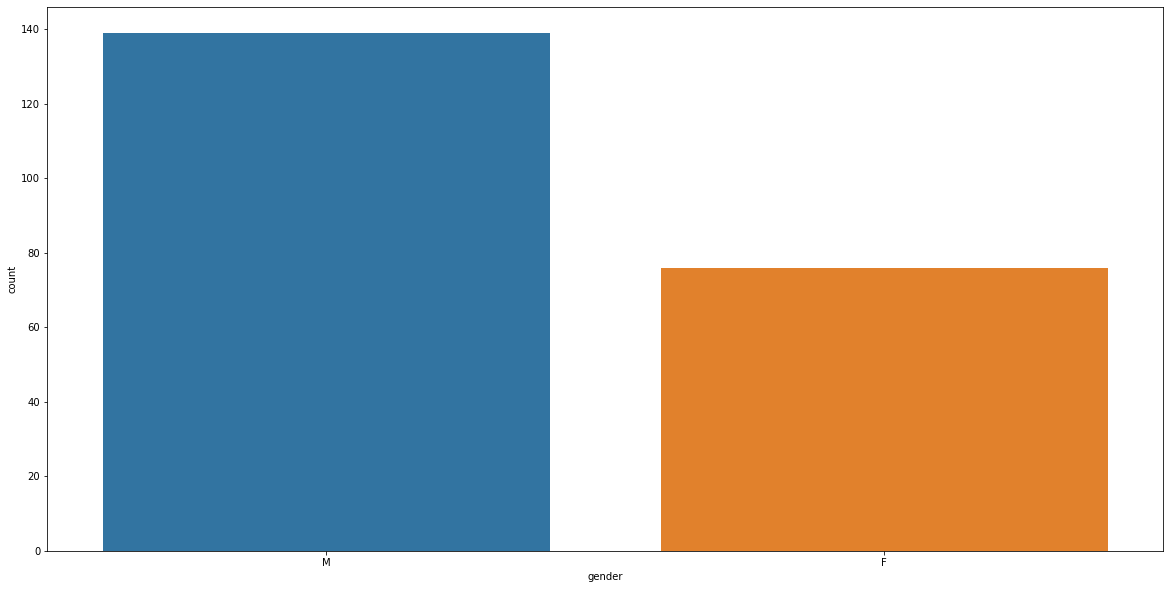

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='gender')

In [10]:
pd.crosstab(data['specialisation'],data['status'])
# students taking Mkt&Fin are more likely to get placed


status,Not Placed,Placed
specialisation,,
Mkt&Fin,25,95
Mkt&HR,42,53


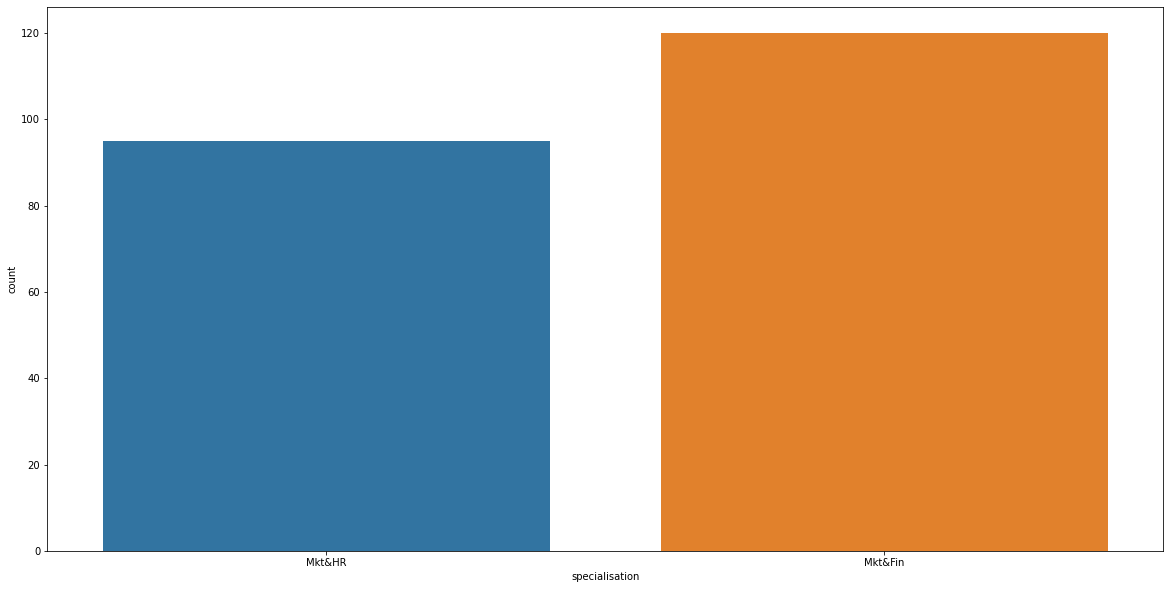

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x="specialisation", data=data)


In [12]:
pd.crosstab(data['workex'],data['status'])
#very few students with experience are not place

status,Not Placed,Placed
workex,,
No,57,84
Yes,10,64


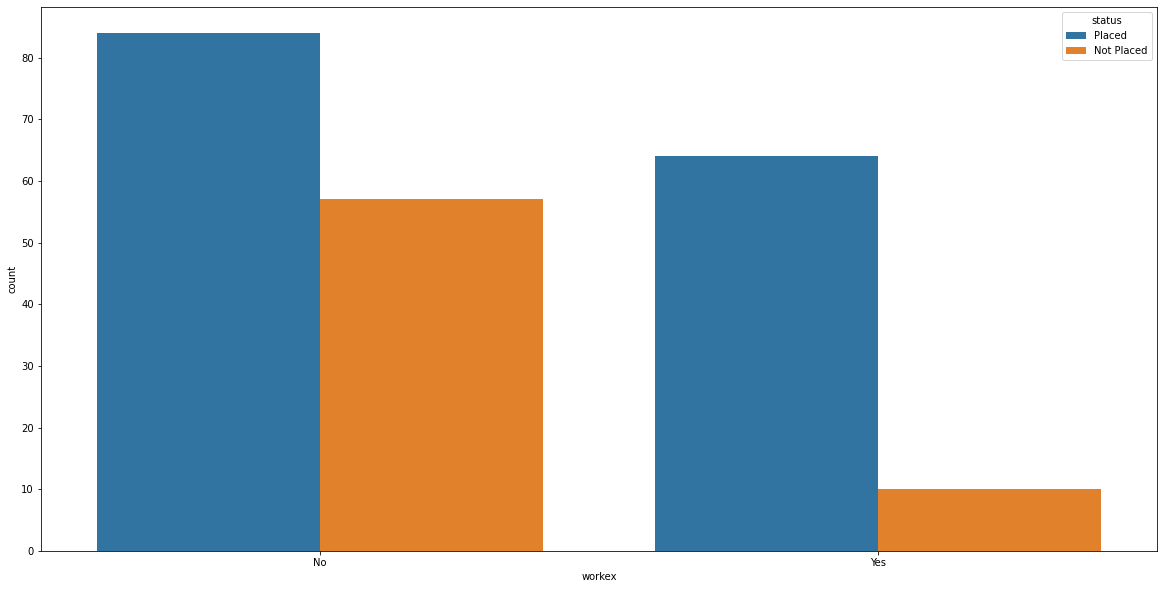

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='workex', hue='status')
#very few students with experience are not placed

In [14]:
pd.crosstab(data['ssc_b'],data['status'])

status,Not Placed,Placed
ssc_b,,
Central,38,78
Others,29,70


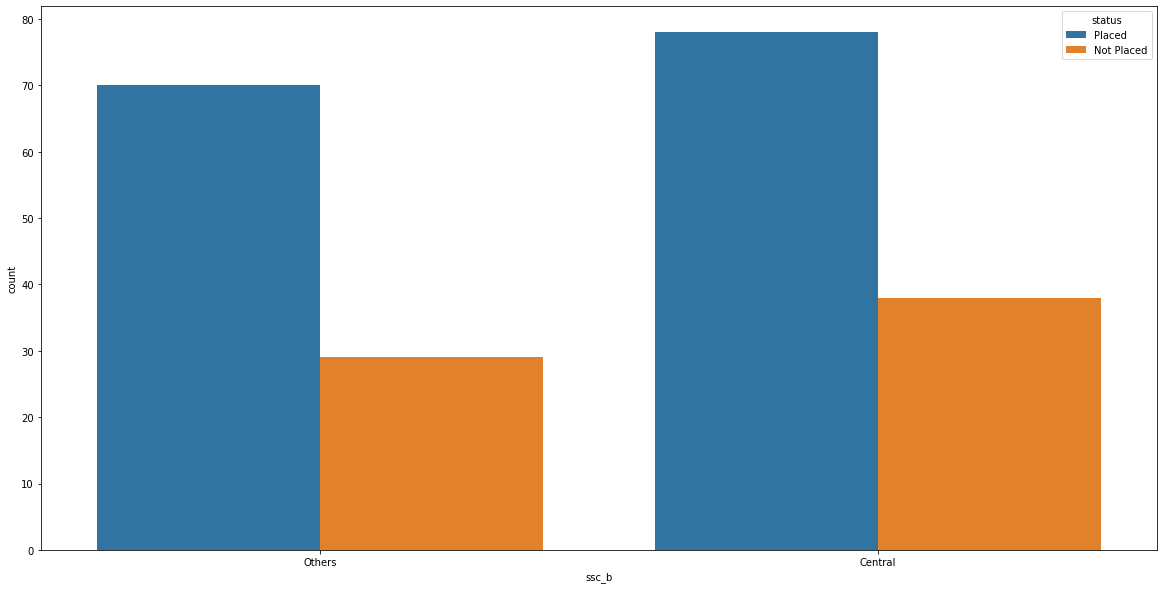

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='ssc_b', hue='status')

In [16]:
pd.crosstab(data['hsc_b'],data['status'])

status,Not Placed,Placed
hsc_b,,
Central,27,57
Others,40,91


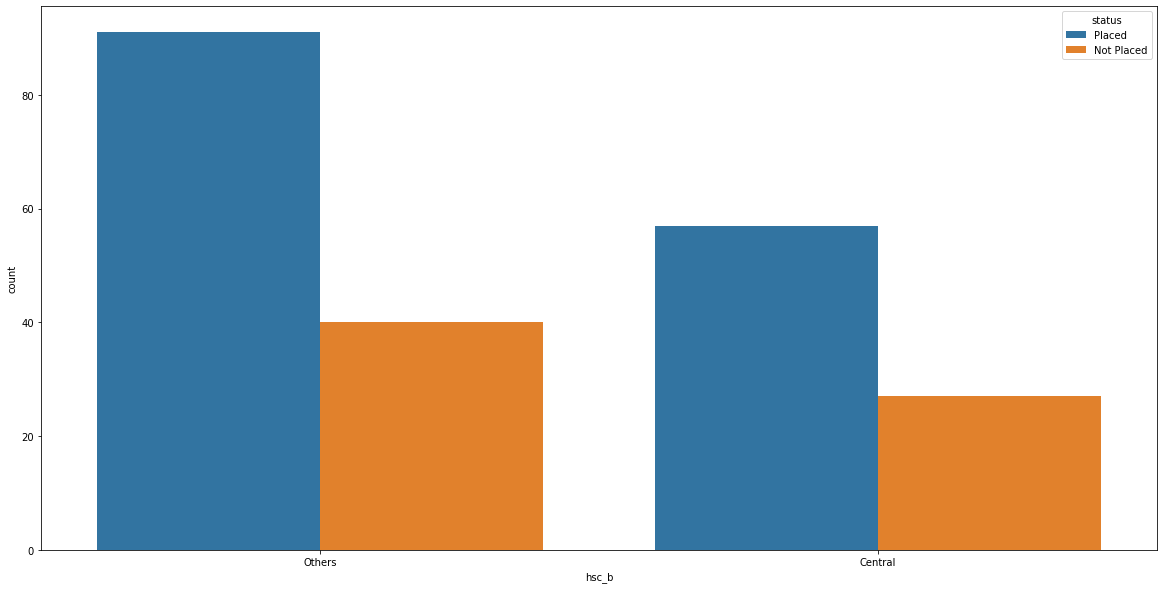

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='hsc_b', hue='status')

In [18]:
pd.crosstab(data['hsc_s'],data['status'])

status,Not Placed,Placed
hsc_s,,
Arts,5,6
Commerce,34,79
Science,28,63


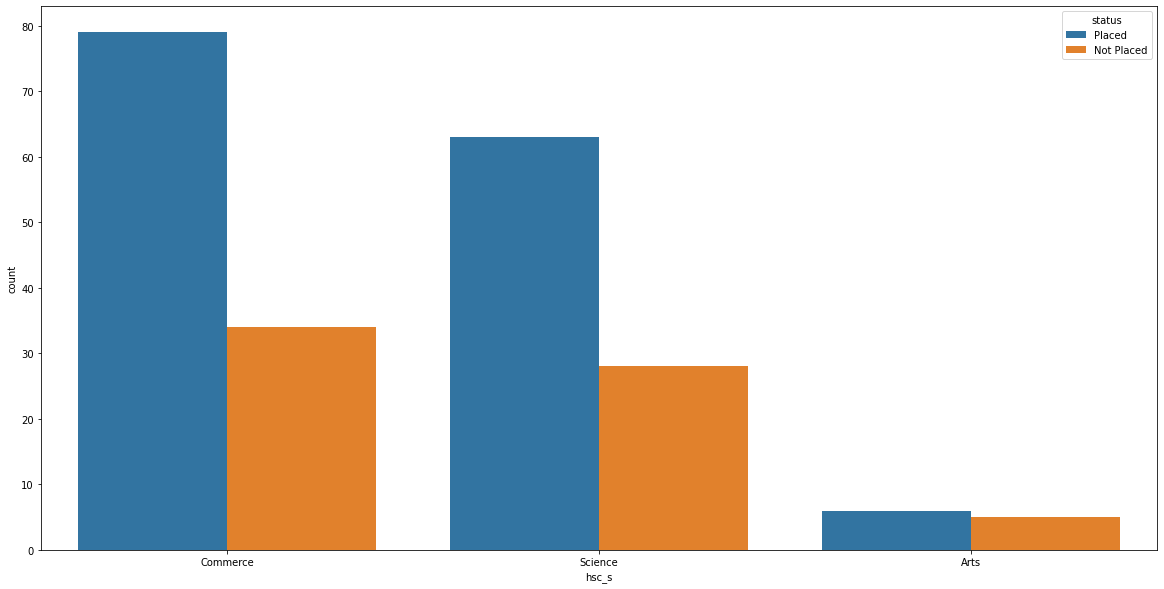

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='hsc_s', hue='status')

In [20]:
pd.crosstab(data['degree_t'],data['status'])

status,Not Placed,Placed
degree_t,,
Comm&Mgmt,43,102
Others,6,5
Sci&Tech,18,41


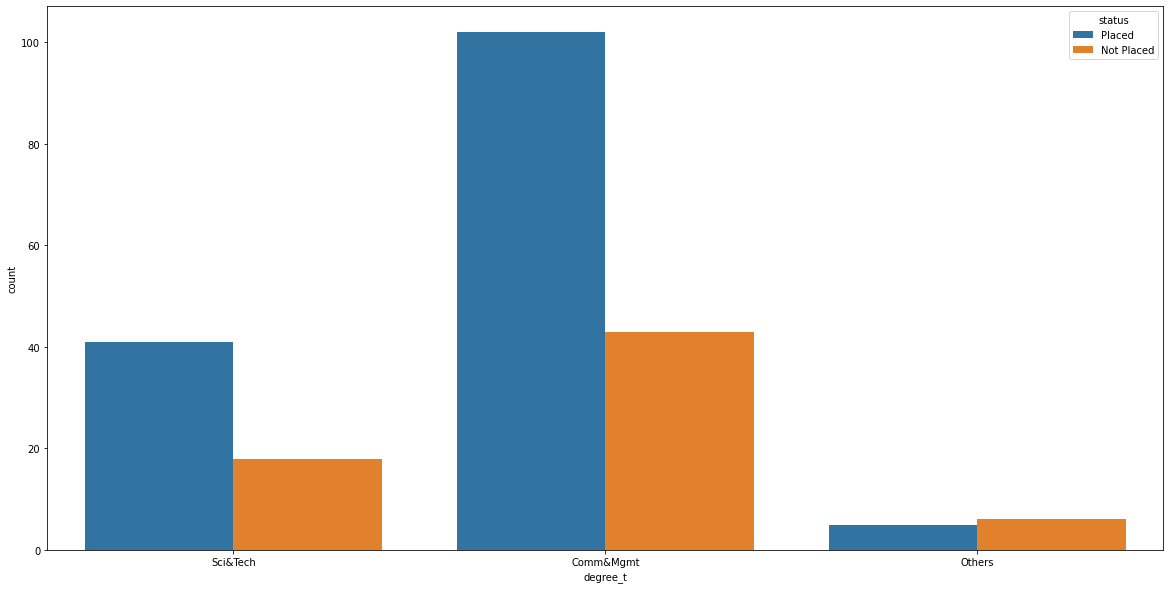

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='degree_t', hue='status')

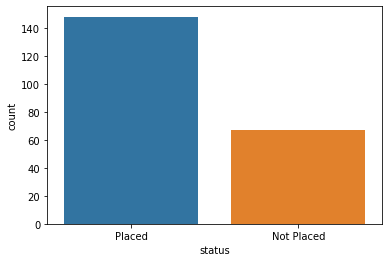

In [22]:
sns.countplot(data=data,x='status')

In [23]:
corr_matrix=data.corr()
corr_matrix

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000


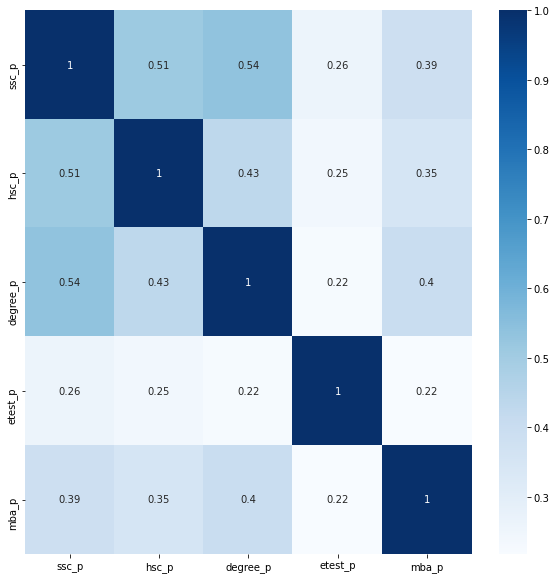

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True, cmap='Blues')

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


In [26]:
data.describe(include='O').T

,count,unique,top,freq
gender,215,2,M,139
ssc_b,215,2,Central,116
hsc_b,215,2,Others,131
hsc_s,215,3,Commerce,113
degree_t,215,3,Comm&Mgmt,145
workex,215,2,No,141
specialisation,215,2,Mkt&Fin,120
status,215,2,Placed,148


In [27]:
#Dividing variables into dependent and independent variables:
X=data.drop(['status'],axis=1)
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50


In [28]:
Y=data[['status']]


In [29]:
Y=data['status'].map({'Not Placed':0,'Placed':1})

In [30]:
#Converting categorical variable into numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le_gender=LabelEncoder()
le_ssc_b=LabelEncoder()
le_hsc_b=LabelEncoder()
le_hsc_s=LabelEncoder()
le_degree_t=LabelEncoder()
le_workex=LabelEncoder()
le_specialisation=LabelEncoder()
le_status=LabelEncoder()

In [31]:
X['n_gender']=le_gender.fit_transform(X['gender'])
X['n_ssc_b']=le_ssc_b.fit_transform(X['ssc_b'])
X['n_hsc_b']=le_hsc_b.fit_transform(X['hsc_b'])
X['n_hsc_s']=le_hsc_s.fit_transform(X['hsc_s'])
X['n_degree_t']=le_degree_t.fit_transform(X['degree_t'])
X['n_workex']=le_workex.fit_transform(X['workex'])
X['n_specialisation']=le_specialisation.fit_transform(X['specialisation'])

In [32]:
X=X.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1)
X.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,n_gender,n_ssc_b,n_hsc_b,n_hsc_s,n_degree_t,n_workex,n_specialisation
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,2,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,2,2,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,2,2,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0


In [33]:
data2=X

In [34]:
#To get the data on same scale we use Standard Scaler:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_new= scaler.fit_transform(X)
X_new

array([[-0.02808697,  2.2688123 , -1.14010225, ...,  1.57628354,
        -0.72444647,  1.12390297],
       [ 1.11336869,  1.10344799,  1.51326671, ...,  1.57628354,
         1.38036423, -0.88975652],
       [-0.21323793,  0.15331275, -0.32284282, ..., -0.67555009,
        -0.72444647, -0.88975652],
       ...,
       [-0.02808697,  0.06133451,  0.90304633, ..., -0.67555009,
         1.38036423, -0.88975652],
       [ 0.61994138, -0.03064373, -1.14010225, ..., -0.67555009,
        -0.72444647,  1.12390297],
       [-0.49096436, -0.76646966, -1.82115177, ..., -0.67555009,
        -0.72444647,  1.12390297]])

In [35]:
X_new= pd.DataFrame(X_new,columns=data2.columns)
X_new.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,n_gender,n_ssc_b,n_hsc_b,n_hsc_s,n_degree_t,n_workex,n_specialisation
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,0.739434,1.082459,0.800763,-0.641955,1.576284,-0.724446,1.123903
1,1.113369,1.103448,1.513267,1.087157,0.687620,0.739434,-0.923823,0.800763,1.083298,1.576284,1.380364,-0.889757
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,0.739434,-0.923823,-1.248809,-2.367207,-0.675550,-0.724446,-0.889757
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,0.739434,-0.923823,-1.248809,1.083298,1.576284,-0.724446,1.123903
4,1.712332,0.668391,0.943909,1.864806,-1.164676,0.739434,-0.923823,-1.248809,-0.641955,-0.675550,-0.724446,-0.889757


In [36]:
#Splitting data into train and test:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X_new,Y,test_size=0.20,random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((172, 12), (43, 12), (172,), (43,))

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Logistic Regression:

In [38]:
log_regressor=LogisticRegression(random_state=0)
log_regressor.fit(X_train,Y_train)
Y_pred=log_regressor.predict(X_test)
acc_score=accuracy_score(Y_test,Y_pred)
class_report=classification_report(Y_test,Y_pred) 
print('The accuracy score of test set is',acc_score*100)
print(class_report)
print(confusion_matrix(Y_test,Y_pred))

The accuracy score of test set is 81.3953488372093
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.83      0.89      0.86        27

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43

[[11  5]
 [ 3 24]]


Support Vector Machine (SVM):

In [39]:
svc1=SVC(random_state=0)
svc1.fit(X_train,Y_train)
Y_pred1=svc1.predict(X_test)
print('The accuracy score for test dataset is:',accuracy_score(Y_test,Y_pred1)*100)
print(classification_report(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))

The accuracy score for test dataset is: 76.74418604651163
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.76      0.93      0.83        27

    accuracy                           0.77        43
   macro avg       0.78      0.71      0.72        43
weighted avg       0.77      0.77      0.75        43

[[ 8  8]
 [ 2 25]]


#Hyper Parameter Tuning for SVM

In [40]:
svc=SVC() 
parameters1=[{'C':[1, 10, 100, 1000], 'kernel':['linear','rbf','poly'],'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
               
grid_search1 = GridSearchCV(estimator = svc,  
                           param_grid = parameters1,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search1.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['linear', 'rbf', 'poly']}],
             scoring='accuracy')

In [41]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score :',(grid_search1.best_score_)*100)


# print parameters that give the best results
print('Parameters that give the best results :', (grid_search1.best_params_))


# print estimator that was chosen by the GridSearch
print('Estimator that was chosen by the search :', (grid_search1.best_estimator_))

GridSearch CV best score : 89.51260504201682
Parameters that give the best results : {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Estimator that was chosen by the search : SVC(C=10, gamma=0.1, kernel='linear')


In [42]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set:',(grid_search1.score(X_test, Y_test)*100))

GridSearch CV score on test set: 81.3953488372093


In [43]:
random_forest= RandomForestClassifier()
random_forest.fit(X_train,Y_train)
Y_pred2=random_forest.predict(X_test)
print('The accuracy score for test dataset is:',accuracy_score(Y_test,Y_pred2)*100)
print(classification_report(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))

The accuracy score for test dataset is: 67.44186046511628
              precision    recall  f1-score   support

           0       0.58      0.44      0.50        16
           1       0.71      0.81      0.76        27

    accuracy                           0.67        43
   macro avg       0.65      0.63      0.63        43
weighted avg       0.66      0.67      0.66        43

[[ 7  9]
 [ 5 22]]


In [44]:
placed= data1[(data1['status']=='Placed')]
placed=placed.drop(['status'],axis=1)
placed.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,252000.0


In [45]:
X1=placed.drop(['salary'],axis=1)
X1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14


In [46]:
Y1=placed[['salary']]
Y1.head()

,salary
0,270000.0
1,200000.0
2,250000.0
4,425000.0
7,252000.0


In [47]:
le_gender1=LabelEncoder()
le_ssc_b1=LabelEncoder()
le_hsc_b1=LabelEncoder()
le_hsc_s1=LabelEncoder()
le_degree_t1=LabelEncoder()
le_workex1=LabelEncoder()
le_specialisation1=LabelEncoder()

In [48]:
X1['n_gender']=le_gender1.fit_transform(X1['gender'])
X1['n_ssc_b']=le_ssc_b1.fit_transform(X1['ssc_b'])
X1['n_hsc_b']=le_hsc_b1.fit_transform(X1['hsc_b'])
X1['n_hsc_s']=le_hsc_s1.fit_transform(X1['hsc_s'])
X1['n_degree_t']=le_degree_t1.fit_transform(X1['degree_t'])
X1['n_workex']=le_workex1.fit_transform(X1['workex'])
X1['n_specialisation']=le_specialisation1.fit_transform(X1['specialisation'])

In [49]:
X1=X1.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1)
X1.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,n_gender,n_ssc_b,n_hsc_b,n_hsc_s,n_degree_t,n_workex,n_specialisation
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,2,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,2,2,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0
7,82.00,64.00,66.00,67.0,62.14,1,0,0,2,2,1,0


In [50]:
data3=X1

In [51]:
#To get the data on same scale we use MinMax Scaler:

from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
X_new1= scaler1.fit_transform(X1)
X_new1=pd.DataFrame(X_new1,columns=['ssc_p','hsc_p','degree_p','etest_p','mba_p','n_gender','n_ssc_b','n_hsc_b','n_hsc_s','n_degree_t','n_workex','n_specialisation'])
Y1=Y1.values

In [52]:
import statsmodels.api as sm
model = sm.OLS(Y1, X_new1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              95.11
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    6.14e-60
Time:                        11:36:51   Log-Likelihood:                         -1912.4
No. Observations:                 148   AIC:                                      3849.
Df Residuals:                     136   BIC:                                      3885.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ssc_p             5871.1807   4.97e+04      0.118      0.906   -9.25e+04    1.04e+05
hsc_p             1.367e+05   4.82e+04      2.837      0.005    4.14e+04    2.32e+05
degree_p         -3.176e+04   5.51e+04     -0.576      0.566   -1.41e+05    7.73e+04
etest_p           4.045e+04   3.47e+04      1.167      0.245   -2.81e+04    1.09e+05
mba_p             1.224e+05   4.83e+04      2.534      0.012    2.69e+04    2.18e+05
n_gender          7.023e+04   1.83e+04      3.838      0.000     3.4e+04    1.06e+05
n_ssc_b           2.956e+04    2.4e+04      1.229      0.221    -1.8e+04    7.71e+04
n_hsc_b          -1.397e+04   2.39e+04     -0.583      0.561   -6.13e+04    3.34e+04
n_hsc_s           1.453e+05   3.83e+04      3.795      0.000    6.96e+04    2.21e+05
n_degree_t        -2.67e+04   2.45e+04     -1.088      0.279   -7.52e+04    2.18e+04
n_workex          3.075e+04   1.83e+04      1.683      0.095   -5383.664    6.69e+04
n_specialisation  1.255e+04   1.86e+04      0.676      0.500   -2.41e+04    4.92e+04
==============================================================================
Omnibus:                       98.922   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.523
Skew:                           2.245   Prob(JB):                    7.05e-199
Kurtosis:                      14.305   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X_new1=X_new1.drop('ssc_p',axis=1)
model = sm.OLS(Y1, X_new1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              104.5
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    5.90e-61
Time:                        11:36:51   Log-Likelihood:                         -1912.4
No. Observations:                 148   AIC:                                      3847.
Df Residuals:                     137   BIC:                                      3880.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
hsc_p             1.387e+05   4.47e+04      3.104      0.002    5.04e+04    2.27e+05
degree_p         -3.085e+04   5.44e+04     -0.567      0.572   -1.38e+05    7.67e+04
etest_p           4.116e+04    3.4e+04      1.210      0.228   -2.61e+04    1.08e+05
mba_p             1.235e+05   4.73e+04      2.613      0.010       3e+04    2.17e+05
n_gender          7.001e+04   1.81e+04      3.860      0.000    3.41e+04    1.06e+05
n_ssc_b           3.015e+04   2.34e+04      1.287      0.200   -1.62e+04    7.65e+04
n_hsc_b          -1.409e+04   2.38e+04     -0.591      0.555   -6.12e+04     3.3e+04
n_hsc_s           1.469e+05   3.54e+04      4.148      0.000    7.69e+04    2.17e+05
n_degree_t       -2.678e+04   2.44e+04     -1.095      0.275   -7.51e+04    2.16e+04
n_workex          3.095e+04   1.81e+04      1.706      0.090   -4917.450    6.68e+04
n_specialisation  1.267e+04   1.85e+04      0.686      0.494   -2.38e+04    4.92e+04
==============================================================================
Omnibus:                       98.488   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              900.888
Skew:                           2.235   Prob(JB):                    2.37e-196
Kurtosis:                      14.230   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X_new1=X_new1.drop('degree_p',axis=1)
model = sm.OLS(Y1, X_new1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              115.5
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    6.26e-62
Time:                        11:36:51   Log-Likelihood:                         -1912.6
No. Observations:                 148   AIC:                                      3845.
Df Residuals:                     138   BIC:                                      3875.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
hsc_p             1.338e+05   4.37e+04      3.060      0.003    4.73e+04     2.2e+05
etest_p           3.983e+04   3.38e+04      1.177      0.241   -2.71e+04    1.07e+05
mba_p             1.122e+05   4.27e+04      2.626      0.010    2.77e+04    1.97e+05
n_gender           7.07e+04   1.81e+04      3.916      0.000     3.5e+04    1.06e+05
n_ssc_b             2.9e+04   2.33e+04      1.246      0.215    -1.7e+04     7.5e+04
n_hsc_b          -1.372e+04   2.38e+04     -0.577      0.565   -6.07e+04    3.33e+04
n_hsc_s           1.397e+05    3.3e+04      4.236      0.000    7.45e+04    2.05e+05
n_degree_t       -2.421e+04    2.4e+04     -1.010      0.314   -7.16e+04    2.32e+04
n_workex          3.136e+04   1.81e+04      1.735      0.085   -4380.141    6.71e+04
n_specialisation  1.265e+04   1.84e+04      0.687      0.493   -2.38e+04    4.91e+04
==============================================================================
Omnibus:                      100.023   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              940.819
Skew:                           2.271   Prob(JB):                    5.06e-205
Kurtosis:                      14.486   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X_new1=X_new1.drop('n_hsc_b',axis=1)
model = sm.OLS(Y1, X_new1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              128.9
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    6.31e-63
Time:                        11:36:51   Log-Likelihood:                         -1912.7
No. Observations:                 148   AIC:                                      3843.
Df Residuals:                     139   BIC:                                      3870.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
hsc_p             1.306e+05   4.33e+04      3.019      0.003    4.51e+04    2.16e+05
etest_p           4.164e+04   3.36e+04      1.239      0.218   -2.48e+04    1.08e+05
mba_p              1.13e+05   4.26e+04      2.654      0.009    2.88e+04    1.97e+05
n_gender           7.02e+04    1.8e+04      3.902      0.000    3.46e+04    1.06e+05
n_ssc_b           1.995e+04   1.72e+04      1.162      0.247    -1.4e+04    5.39e+04
n_hsc_s            1.34e+05   3.14e+04      4.271      0.000     7.2e+04    1.96e+05
n_degree_t        -2.14e+04   2.34e+04     -0.914      0.362   -6.77e+04    2.49e+04
n_workex          2.964e+04   1.78e+04      1.667      0.098   -5523.835    6.48e+04
n_specialisation  1.288e+04   1.84e+04      0.701      0.484   -2.34e+04    4.92e+04
==============================================================================
Omnibus:                      101.466   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.399
Skew:                           2.302   Prob(JB):                    6.40e-215
Kurtosis:                      14.780   Cond. No.                         9.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X_new1=X_new1.drop('n_specialisation',axis=1)
model = sm.OLS(Y1, X_new1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              145.5
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    6.46e-64
Time:                        11:36:51   Log-Likelihood:                         -1913.0
No. Observations:                 148   AIC:                                      3842.
Df Residuals:                     140   BIC:                                      3866.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hsc_p        1.35e+05   4.27e+04      3.159      0.002    5.05e+04     2.2e+05
etest_p     3.592e+04   3.25e+04      1.103      0.272   -2.84e+04       1e+05
mba_p       1.123e+05   4.25e+04      2.642      0.009    2.83e+04    1.96e+05
n_gender    7.061e+04   1.79e+04      3.934      0.000    3.51e+04    1.06e+05
n_ssc_b     2.045e+04   1.71e+04      1.193      0.235   -1.34e+04    5.43e+04
n_hsc_s     1.427e+05   2.87e+04      4.970      0.000     8.6e+04       2e+05
n_degree_t -2.306e+04   2.32e+04     -0.992      0.323    -6.9e+04    2.29e+04
n_workex    2.843e+04   1.77e+04      1.609      0.110   -6508.426    6.34e+04
==============================================================================
Omnibus:                       99.670   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.461
Skew:                           2.259   Prob(JB):                    1.64e-204
Kurtosis:                      14.479   Cond. No.                         9.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_new1=X_new1.drop('n_degree_t',axis=1)
model = sm.OLS(Y1, X_new1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              166.1
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    7.85e-65
Time:                        11:36:51   Log-Likelihood:                         -1913.5
No. Observations:                 148   AIC:                                      3841.
Df Residuals:                     141   BIC:                                      3862.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hsc_p        1.42e+05   4.22e+04      3.368      0.001    5.86e+04    2.25e+05
etest_p      3.84e+04   3.25e+04      1.183      0.239   -2.58e+04    1.03e+05
mba_p       1.095e+05   4.24e+04      2.584      0.011    2.57e+04    1.93e+05
n_gender    7.188e+04   1.79e+04      4.015      0.000    3.65e+04    1.07e+05
n_ssc_b     2.024e+04   1.71e+04      1.182      0.239   -1.36e+04    5.41e+04
n_hsc_s     1.272e+05   2.41e+04      5.282      0.000    7.96e+04    1.75e+05
n_workex    2.729e+04   1.76e+04      1.548      0.124   -7563.130    6.22e+04
==============================================================================
Omnibus:                       97.504   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.221
Skew:                           2.184   Prob(JB):                    6.14e-203
Kurtosis:                      14.486   Cond. No.                         8.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X_new1=X_new1.drop(['etest_p','n_ssc_b'],axis=1)
model = sm.OLS(Y1, X_new1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              230.0
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    1.65e-66
Time:                        11:36:51   Log-Likelihood:                         -1915.2
No. Observations:                 148   AIC:                                      3840.
Df Residuals:                     143   BIC:                                      3855.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hsc_p       1.537e+05   4.03e+04      3.820      0.000    7.42e+04    2.33e+05
mba_p       1.342e+05   4.03e+04      3.333      0.001    5.46e+04    2.14e+05
n_gender    8.011e+04   1.73e+04      4.622      0.000    4.58e+04    1.14e+05
n_hsc_s     1.396e+05   2.32e+04      6.026      0.000    9.38e+04    1.85e+05
n_workex    2.422e+04   1.75e+04      1.388      0.167   -1.03e+04    5.87e+04
==============================================================================
Omnibus:                       91.682   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              788.795
Skew:                           2.050   Prob(JB):                    5.19e-172
Kurtosis:                      13.540   Cond. No.                         7.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X_new1=X_new1.drop('n_workex',axis=1)
model = sm.OLS(Y1, X_new1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              285.2
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    2.38e-67
Time:                        11:36:51   Log-Likelihood:                         -1916.2
No. Observations:                 148   AIC:                                      3840.
Df Residuals:                     144   BIC:                                      3852.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hsc_p       1.518e+05   4.04e+04      3.762      0.000     7.2e+04    2.32e+05
mba_p        1.48e+05   3.92e+04      3.780      0.000    7.06e+04    2.25e+05
n_gender     8.45e+04   1.71e+04      4.942      0.000    5.07e+04    1.18e+05
n_hsc_s     1.433e+05   2.31e+04      6.206      0.000    9.76e+04    1.89e+05
==============================================================================
Omnibus:                       97.156   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              909.055
Skew:                           2.182   Prob(JB):                    3.99e-198
Kurtosis:                      14.330   Cond. No.                         7.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The factors affecting salaries are:
    1. hsc_p
    2. mba_p
    3. n_gender
    4. n_hsc_s